# Relatório de resultados parciais gerados dia 11/09
### Atividade motora medida em formato ERP nas trials sincronizadas pela saída do animal do nosepoke

- As tentativas foram time-locked à entrada do animal do nosepoke
- Os spikes foram convolucionados com gaussiana de desvio padrão $\sigma_{filter}=20ms$, 
$\mathcal{N}(\mu=0,\sigma_{filter}^2=20^2)$
    - $\textbf{Os ~40ms do início e fim dos plots não devem ser muito considerados devido à convolução incompleta nesses pontos}$
- A taxa de spike dos neurônios foi plotada para todos os neurônios, junto com os intervalos de confiança de 68% e 95% estimados por bootstrap. Essa opção foi escolhida ao invés do desvio padrão devido à piora considerável na qualidade dos gráficos quando escolhido o desvio padrão.
- Dois plots foram feitos:
    - À esquerda, somente foram usadas as tentativas de duração > 3s.
    - À direita, todas as tentativas > 600ms foram usadas.

In [1]:
from spikeHelper.visuals import motorPlot
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Rato 7

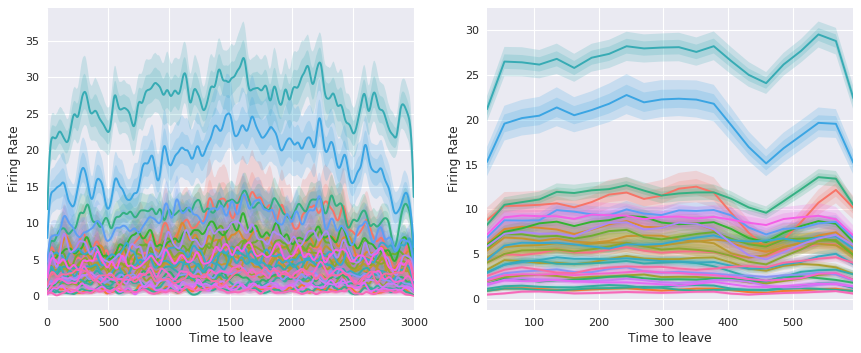

In [3]:
rat = 7
filename = 'Data/r'+str(rat)+'_filtered_epoch_gabi.pickle'
epochs = pickle.load(open(filename,'rb'))

fig = plt.figure(figsize=(13, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
motorPlot(epochs,timelock='end', totalTime=3000,sigma=20, binSize=2)
plt.subplot(1,2,2)
motorPlot(epochs, timelock='end', totalTime=800,sigma=20, binSize=27)

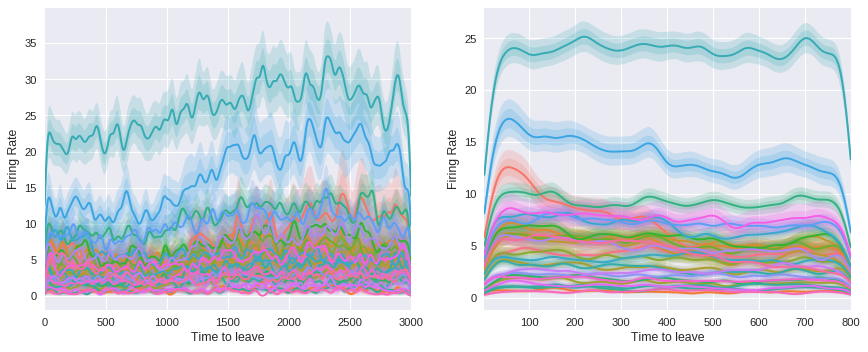

In [2]:
rat = 7
filename = 'Data/r'+str(rat)+'_filtered_epoch_gabi.pickle'
epochs = pickle.load(open(filename,'rb'))

fig = plt.figure(figsize=(13, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
motorPlot(epochs,timelock='beg', totalTime=3000,sigma=20,binSize=2)
plt.subplot(1,2,2)
motorPlot(epochs, timelock='beg', totalTime=800,sigma=20,binSize=2)

## Rato 8

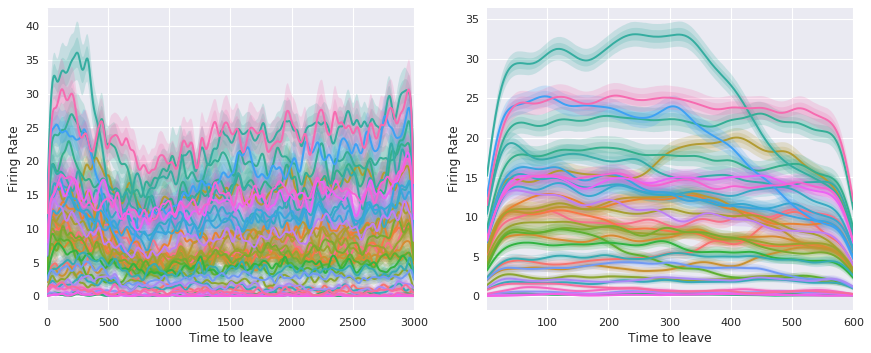

In [5]:
rat = 8
filename = 'Data/r'+str(rat)+'_filtered_epoch_gabi.pickle'
epochs = pickle.load(open(filename,'rb'))

fig = plt.figure(figsize=(13, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
motorPlot(epochs,timelock='beg', totalTime=3000,sigma=20,binSize=2)
plt.subplot(1,2,2)
motorPlot(epochs,timelock='beg', totalTime=600,sigma=20,binSize=2)

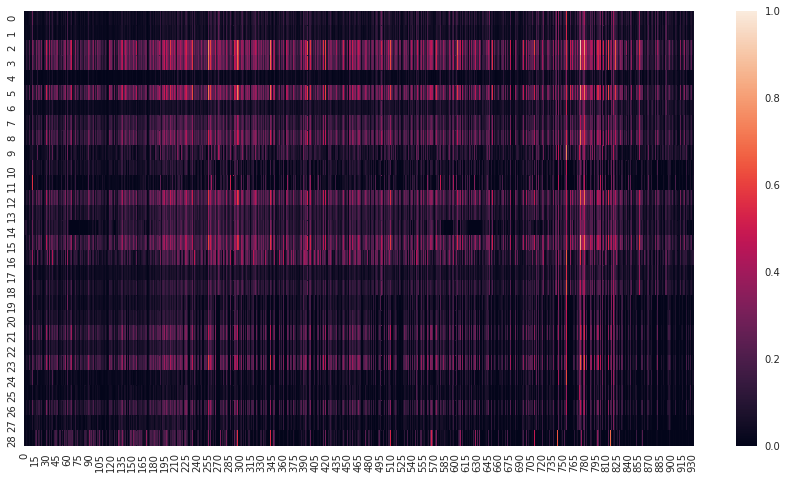

In [36]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(normRows(epochs.applymap(np.sum).values))

## Rato 9

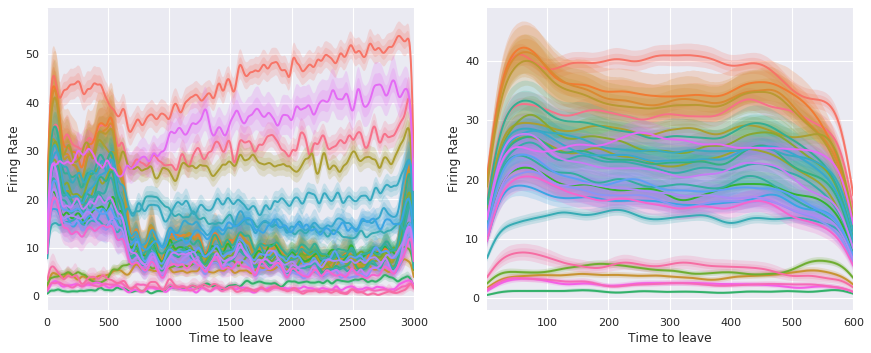

In [6]:
rat = 9
filename = 'Data/r'+str(rat)+'_filtered_epoch_gabi.pickle'
epochs = pickle.load(open(filename,'rb'))

fig = plt.figure(figsize=(13, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
motorPlot(epochs,timelock='beg', totalTime=3000,sigma=20,binSize=2)
plt.subplot(1,2,2)
motorPlot(epochs,timelock='beg', totalTime=600,sigma=20,binSize=2)

## Rato 10

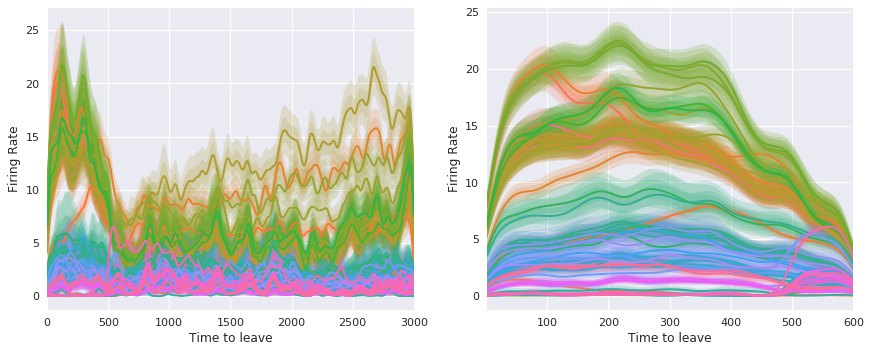

In [7]:
rat = 10
filename = 'Data/r'+str(rat)+'_filtered_epoch_gabi.pickle'
epochs = pickle.load(open(filename,'rb'))

fig = plt.figure(figsize=(13, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
motorPlot(epochs,timelock='beg', totalTime=3000,sigma=20,binSize=2)
plt.subplot(1,2,2)
motorPlot(epochs,timelock='beg', totalTime=600,sigma=20,binSize=2)

# Conclusão
A atividade possui um pico próximo à saída no animal, com um formato característico e duração de 200ms para os animais 7,9,10, e 300ms para o animal 8. Antes disso, a atividade parece atingir um platô próxima à taxa de ativação média marginalizando o tempo (ver mais abaixos). Isso parece indicar que a atividade de cada neurônio é pouco sincronizada em relação à saída.

---

# Suplementares
##### Rato 9 repetido com a medida de desvio padrão ao invés dos intervalos de confiança.

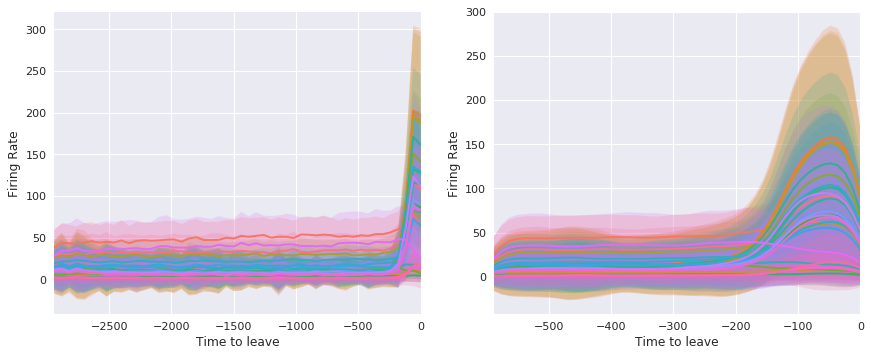

In [2]:
rat = 9
filename = 'Data/r'+str(rat)+'_filtered_epoch_gabi.pickle'
epochs = pickle.load(open(filename,'rb'))

fig = plt.figure(figsize=(13, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
motorPlot(epochs, totalTime=3000,sigma=20,error='sd')
plt.subplot(1,2,2)
motorPlot(epochs, totalTime=600,sigma=20,error='sd')

##### Rato 8 utilizando apenas tentativas de tamanho parecido, à esquerda de 3000 a 3500ms, e à direita de 600 a 900ms.
O componente motor da atividade não é nada aparente nesse caso. O significado disso não é claro para mim.

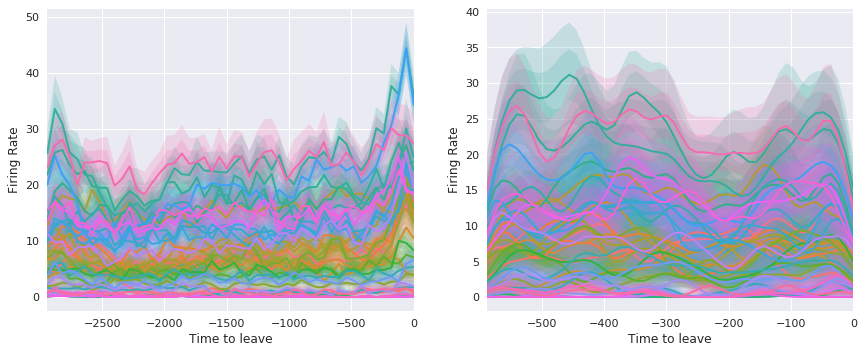

In [37]:
rat = 8
filename = 'Data/r'+str(rat)+'_filtered_epoch_gabi.pickle'
epochs = pickle.load(open(filename,'rb'))
duration = epochs.applymap(len).iloc[0].values

fig = plt.figure(figsize=(13, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
motorPlot(epochs.iloc[:,duration<3500], totalTime=3000,sigma=20)
plt.subplot(1,2,2)
motorPlot( epochs.iloc[:,duration<900], totalTime=600,sigma=20)

#### Dois neurônios retirados do rato 8, sua atividade média e desvio padrão.
Para clarificar quanto a atividade é variável entre as tentativas para os neurônios.

À esquerda, a atividade dos neurônios em todas as tentativas. À direita, a média e desvio padrão.

In [ ]:
import numpy as np
from spikeHelper.filters import convHist
rat = 8
filename = 'Data/r'+str(rat)+'_filtered_epoch_gabi.pickle'
epochs = pickle.load(open(filename,'rb'))

endSync = epochs.iloc[:,(epochs.applymap(len).iloc[0]>600).values].applymap(lambda x: x[-600:])
neuron1 = np.vstack(endSync.iloc[1].apply(lambda x: convHist(x, sigma=20, bins=50)).values)
neuron2 = np.vstack(endSync.iloc[2].apply(lambda x: convHist(x, sigma=20, bins=50)).values)

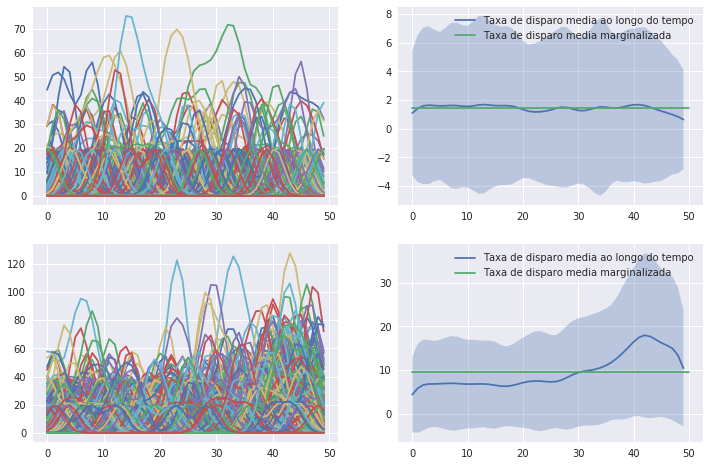

In [33]:
fig = plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
f1 = plt.plot(np.transpose(neuron1))
plt.subplot(2,2,2)
f2 = plt.plot(neuron1.mean(axis=0),label='Taxa de disparo media ao longo do tempo')
plt.fill_between(np.arange(50),neuron1.mean(axis=0)-neuron1.std(axis=0),neuron1.mean(axis=0)+neuron1.std(axis=0),alpha=.3)
plt.plot([0,50],[neuron1.mean(),neuron1.mean()],label='Taxa de disparo media marginalizada'); plt.legend(loc='upper right')
plt.subplot(2,2,3)
f4 = plt.plot(np.transpose(neuron2))
plt.subplot(2,2,4)
f5 = plt.plot(neuron2.mean(axis=0),label='Taxa de disparo media ao longo do tempo')
plt.fill_between(np.arange(50),neuron2.mean(axis=0)-neuron2.std(axis=0),neuron2.mean(axis=0)+neuron2.std(axis=0),alpha=.3)
plt.plot([0,50],[neuron2.mean(),neuron2.mean()],label='Taxa de disparo media marginalizada'); plt.legend(loc='upper right')